## 資料載入與前處理（結合 review + offering 資料）
- 過濾掉 hotel_class 為空值的資料
- 合併資料集

In [5]:


import pandas as pd
import ast
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

review = pd.read_csv("./raw_data/reviews.csv")
offering = pd.read_csv("./raw_data/offerings.csv")
offering = offering[offering['hotel_class'].notna()]
merged = review.merge(offering, left_on='offering_id', right_on='id', suffixes=('_review', '_offering'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 清理資料
- 詞幹正規化 & 停用字 & 小寫 & 單一字

In [ ]:
merged['text'] = merged['text'].astype(str)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word)>1]
    return ' '.join(tokens)

merged['clean_text'] = merged['text'].apply(preprocess)


## 根據評論預測飯店星等（hotel_class）
- 建立模型根據顧客評論預測旅館的星等評級（1.0 ~ 5.0，間隔 0.5）


===== Model: Logistic Regression =====


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.50      0.25      0.33         4
         1.5       0.41      0.37      0.39        19
         2.0       0.69      0.74      0.71       224
         2.5       0.63      0.57      0.60       187
         3.0       0.67      0.77      0.72       223
         3.5       0.67      0.46      0.55       121
         4.0       0.69      0.71      0.70       118
         4.5       0.37      0.39      0.38        18
         5.0       0.61      0.77      0.68        22

    accuracy                           0.66       936
   macro avg       0.58      0.56      0.56       936
weighted avg       0.66      0.66      0.65       936



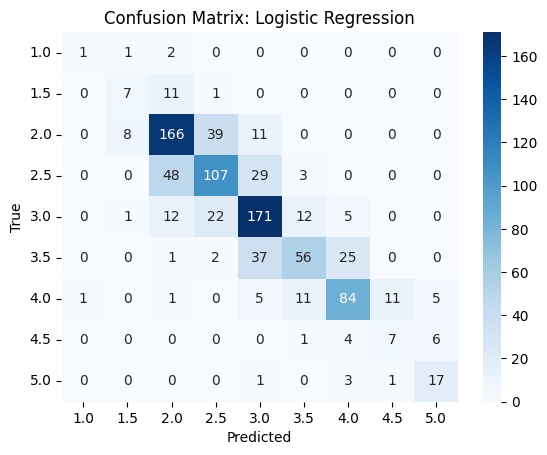


===== Model: Linear SVM =====


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

         1.0       0.50      0.25      0.33         4
         1.5       0.33      0.32      0.32        19
         2.0       0.67      0.70      0.68       224
         2.5       0.56      0.53      0.55       187
         3.0       0.57      0.68      0.62       223
         3.5       0.53      0.41      0.46       121
         4.0       0.69      0.59      0.64       118
         4.5       0.50      0.39      0.44        18
         5.0       0.63      0.77      0.69        22

    accuracy                           0.60       936
   macro avg       0.55      0.52      0.53       936
weighted avg       0.60      0.60      0.59       936



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


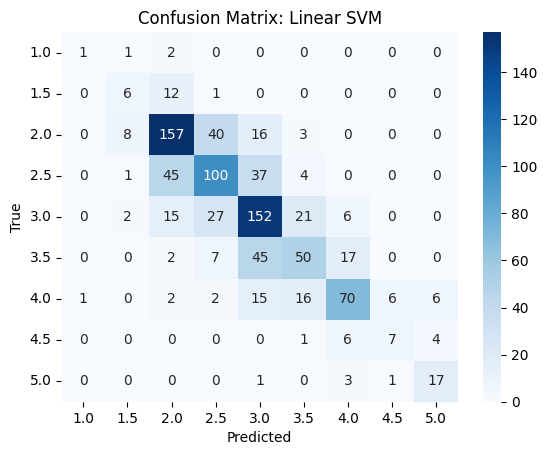


===== Model: Naive Bayes =====
              precision    recall  f1-score   support

         1.0       0.20      0.50      0.29         4
         1.5       0.38      0.32      0.34        19
         2.0       0.71      0.35      0.47       224
         2.5       0.44      0.85      0.58       187
         3.0       0.59      0.29      0.39       223
         3.5       0.41      0.68      0.51       121
         4.0       0.67      0.36      0.46       118
         4.5       0.13      0.22      0.16        18
         5.0       0.49      0.82      0.61        22

    accuracy                           0.49       936
   macro avg       0.44      0.49      0.42       936
weighted avg       0.56      0.49      0.47       936



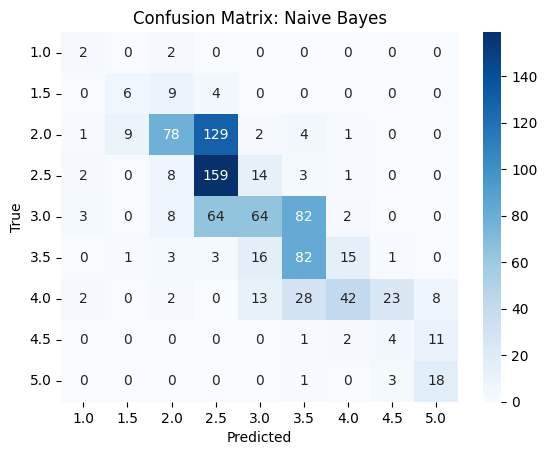


===== Model: Random Forest =====
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         1.5       0.00      0.00      0.00        19
         2.0       0.70      0.83      0.76       224
         2.5       0.70      0.61      0.65       187
         3.0       0.60      0.75      0.67       223
         3.5       0.54      0.40      0.46       121
         4.0       0.67      0.65      0.66       118
         4.5       0.00      0.00      0.00        18
         5.0       0.78      0.64      0.70        22

    accuracy                           0.65       936
   macro avg       0.44      0.43      0.43       936
weighted avg       0.62      0.65      0.63       936



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

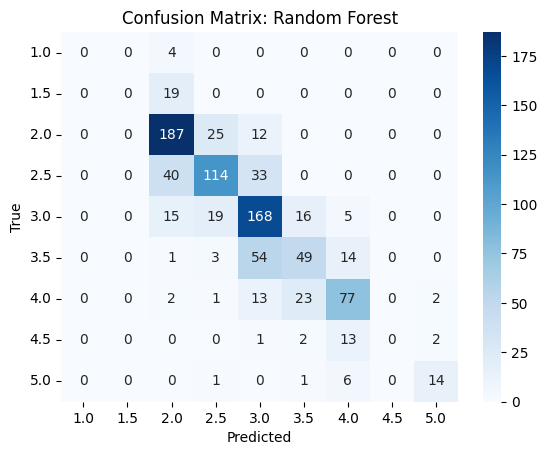

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [7]:
# 準備資料
# 以 offering_id 為單位彙整所有評論文字
# hotel_texts
hotel_texts = merged.groupby('offering_id')['clean_text'].apply(lambda x: ' '.join(x.dropna()))
# hotel_labels
hotel_labels = merged.groupby('offering_id')['hotel_class'].first()
# 特徵與標籤
# X = merged['clean_text']
# y = merged['hotel_class'].astype(str)
X = hotel_texts.values
y = hotel_labels.astype(str).values

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# 切分資料集：70% 訓練，30% 測試
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 向量化訓練資料
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# 比較模型效能
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Linear SVM", LinearSVC()),
    ("Naive Bayes", MultinomialNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42))
]

results = {}

for name, clf in models:
    print(f"\n===== Model: {name} =====")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(np.unique(y)))
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=sorted(np.unique(y)), yticklabels=sorted(np.unique(y)))
    ax.set_title(f"Confusion Matrix: {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.yticks(rotation=0)
    plt.show()

    results[name] = classification_report(y_test, y_pred, output_dict=True)

## 模型用於實際預測

In [8]:
# 多筆評論預測函式
# 向量化與模型訓練
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
vec_X = vectorizer.fit_transform(X)
clf_final = LogisticRegression(max_iter=1000)
clf_final.fit(vec_X, y)

# 預測新飯店評論集合的星等（多評論合併為單一飯店）
def predict_hotel_star_from_reviews(text_list):
    merged = ' '.join(text_list)
    clean_text = re.sub(r'[^a-z ]', ' ', merged.lower())
    vec = vectorizer.transform([clean_text])
    return clf_final.predict(vec)[0]

# 測試多筆評論合併後預測飯店星等
sample_reviews = [
    "The location was fantastic and staff were helpful.",
    "Room was small but clean, and the price was fair.",
    "Would definitely stay here again!"
]
pred_star = predict_hotel_star_from_reviews(sample_reviews)
print(f"這些評論預測的飯店星等為: {pred_star}")

這些評論預測的飯店星等為: 2.0


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
